In [169]:
import yfinance as yf

# Get the financial statement data for the company
stock = yf.Ticker("MSFT")
income_statement = stock.financials
#print(income_statement)

# Extract the revenue, net income, and EPS from the income statement data
revenue = income_statement['2022-06-30']['Total Revenue']
net_income = income_statement['2022-06-30']['Net Income']
eps = income_statement['2022-06-30']['Basic EPS']
bvp = stock.info['bookValue']

# Calculate the P/E ratio
pe_ratio = stock.info['regularMarketPrice']/eps
# Calculate the P/B ratio
pb_ratio = stock.info['regularMarketPrice']/bvp
# Calculate the P/S ratio
ps_ratio = stock.info['regularMarketPrice']/revenue

# Print the extracted data
print("Revenue:", revenue)
print("Net Income:", net_income)
print("EPS:", eps)
print("book value:", bvp)
print("P/E Ratio:", pe_ratio)
print("P/B Ratio:", pb_ratio)
print("P/S Ratio:", ps_ratio)

Revenue: 198270000000.0
Net Income: 72738000000.0
EPS: 9.7
book value: 23.276
P/E Ratio: 24.76494845360825
P/B Ratio: 10.320501804433752
P/S Ratio: 1.2115801684571543e-09


In [149]:
from newscatcherapi import NewsCatcherApiClient
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

# Initialize the NewsCatcher object
api = NewsCatcherApiClient(x_api_key='4Qy3zQEnUJxLT1pfC8LpUKy_YIttDsr5QRrCb14DcwM')
stock_symbol = 'AAPL'
sia = SentimentIntensityAnalyzer()
# Search for news articles related to a specific stock or market index
articles = api.get_search(stock_symbol)
#print(articles['articles'])
# Analyze the sentiment of the articles
for article in articles['articles']:
    text = article['title']+' '+article['summary']
    sentiment = sia.polarity_scores(text)
    #print(f'Title: {article["title"]}')
    #print(f'Sentiment: {sentiment}')
    #print()

## Another Method to do sentiment analysis
from pygooglenews import GoogleNews

gn = GoogleNews()
s = gn.search('AAPL OR Apple')

compound = []
# Analyze the sentiment of the articles
for article in s["entries"]:
    sentiment = sia.polarity_scores(article['title'])
    #print(f'Title: {article["title"]}')
    #print(f'Sentiment: {sentiment}')
    compound.append(sentiment['compound'])

print("GoogleNews search: ",np.mean(np.array(compound)))

Title: Apple is working on new smart home products to compete with Amazon and Google
Sentiment: {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.886}

Title: Apple boosts price of HomePod mini in various European countries
Sentiment: {'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.5994}

Title: AAPL daily
Sentiment: {'neg': 0.038, 'neu': 0.934, 'pos': 0.028, 'compound': -0.0516}

Title: Apple unveils new $299 HomePod, continuing product launch blitz (AAPL)
Sentiment: {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.936}

Title: Apple: Share Repurchases On Auto-Pilot Is A Yellow Flag (NASDAQ:AAPL)
Sentiment: {'neg': 0.151, 'neu': 0.683, 'pos': 0.167, 'compound': 0.2023}

Title: Apple appeals against investigation from UK regulator over cloud gaming
Sentiment: {'neg': 0.012, 'neu': 0.916, 'pos': 0.072, 'compound': 0.6736}

Title: why Apple Inc. [AAPL] is a Good Choice for Investors After New Price Target of $172.67
Sentiment: {'neg': 0.045, 'neu': 0.818, 'pos': 0.138, 

When considering investing in stocks, there are several key factors that you should take into account. These factors can help you make an informed decision about whether a particular stock is a good investment for you. Here are a few key factors to consider:

Financial performance: Look at a company's financial performance over time, including revenue, earnings per share (EPS), net income, and return on equity (ROE). A company that has consistently strong financial performance is typically considered a good investment.

Industry trends: Look at the overall trends in the industry in which the company operates. A company that operates in a growing industry is typically considered a good investment.

Management: Look at the management team of the company. A company with experienced and successful management is typically considered a good investment.

Valuation: Look at the company's valuation in relation to its earnings, sales and assets. A company that is undervalued is considered a good investment.

Diversification: Diversify your portfolio by investing in different sectors, industries and companies. This can help reduce the risk of losing money if one company or sector performs poorly.

Risk and return tradeoff: Look at the risk and return trade-off of the stock, in general, high-risk stocks provide higher returns and low-risk stocks provide low returns.

News and sentiment: Look for any recent news or sentiment about the company, including news about new products or partnerships, legal or regulatory issues, or other developments that might affect the company's performance.

The economy: Look at the overall state of the economy, it can have a significant impact on the stock market and individual stocks.

It is important to conduct thorough research and due diligence before making any investment decisions. It's also important to understand that past performance is not a guarantee of future results, and that the stock market is subject to a wide range of risks and uncertainties.

In [151]:
## Economy Performance
import pandas_datareader as pdr

# Retrieve GDP data from the FRED
gdp = pdr.get_data_fred('GDP')
print(gdp.tail())

# Retrieve CPI data from the FRED
cpi = pdr.get_data_fred('CPIAUCNS')
print(cpi.tail())


                  GDP
DATE                 
2021-07-01  23550.420
2021-10-01  24349.121
2022-01-01  24740.480
2022-04-01  25248.476
2022-07-01  25723.941
            CPIAUCNS
DATE                
2022-08-01   296.171
2022-09-01   296.808
2022-10-01   298.012
2022-11-01   297.711
2022-12-01   296.797


In [175]:
import pandas as pd
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'IN'],start=2005, end=2008)
# specify the country and the indicator (GDP)
print(dat)


# retrieve the data


                    NY.GDP.PCAP.KD
country       year                
Canada        2008    42063.633052
              2007    42097.435120
              2006    41646.414637
              2005    40989.526824
India         2008     1087.582753
              2007     1070.131260
              2006     1008.666876
              2005      947.763189
United States 2008    53854.160612
              2007    54299.617241
              2006    53738.091725
              2005    52789.731419


In [66]:
def Plot(all_data):
    start = dt.datetime.strptime('2022-10-12', '%Y-%m-%d')
    end = dt.datetime.strptime(str(today), '%Y-%m-%d')
    sns.set()

    fig = plt.figure(facecolor = 'white', figsize = (20,10))

    ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
    ax0.plot(all_data.loc[start:end,['Close','upperband','lowerband']])
    ax0.set_facecolor('ghostwhite')
    ax0.legend(['Close','upperband','lowerband'],ncol=3, loc = 'upper left', fontsize = 15)
    plt.title("Apple Stock Price, Slow and Fast Moving Average", fontsize = 20)

    ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
    ax1.plot(all_data.loc[start:end,['SMA_ratio']], color = 'blue')
    ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
    ax1.set_facecolor('silver')
    plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
    plt.show()

In [67]:
def SimpleMovingAverage(all_data):
    all_data['SMA_5'] = all_data['Close'].transform(lambda x: x.rolling(window = 5).mean())
    all_data['SMA_15'] = all_data['Close'].transform(lambda x: x.rolling(window = 15).mean())
    all_data['SMA_ratio'] = all_data['SMA_15'] / all_data['SMA_5']
    return all_data

In [68]:
def Bollinger(all_data):
    all_data['15MA'] = all_data['Close'].transform(lambda x: x.rolling(window=15).mean())
    all_data['SD'] = all_data['Close'].transform(lambda x: x.rolling(window=15).std())
    all_data['upperband'] = all_data['15MA'] + 2*all_data['SD']
    all_data['lowerband'] = all_data['15MA'] - 2*all_data['SD']
    return all_data

C:\Users\nikjo\AppData\Local\Temp\ipykernel_17572\3097966490.py:9: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax0.plot(all_data.loc[start:end,['Close','upperband','lowerband']])
C:\Users\nikjo\AppData\Local\Temp\ipykernel_17572\3097966490.py:15: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax1.plot(all_data.loc[start:end,['SMA_ratio']], color = 'blue')


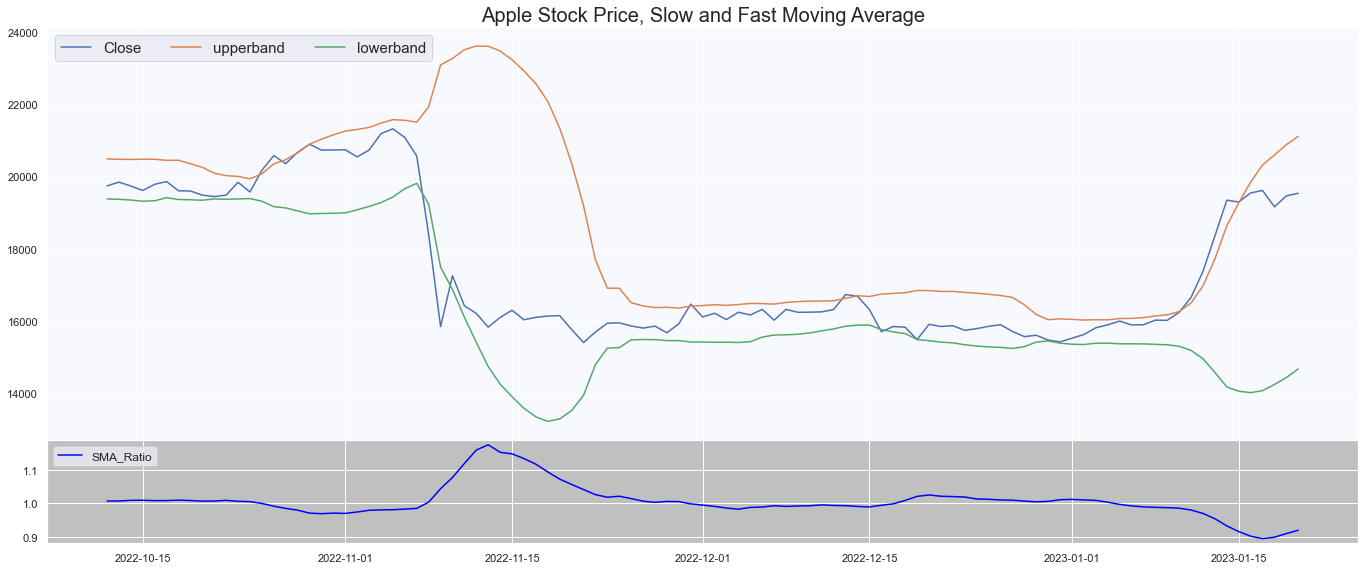

In [69]:
data = Bollinger(df)
Plot(data)